In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/9000-companies-and-its-ratings-dataset/company.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Laoding Data

In [3]:
df = pd.read_csv('/kaggle/input/9000-companies-and-its-ratings-dataset/company.csv',index_col=0)

In [4]:
df

,name,ratings,review_count,ctype,years,hq,employees
0,TCS,3.8,(59.5k Reviews),Public,55 years old,"Mumbai,Maharashtra + 276 more",1 Lakh+ Employees (India)
1,Accenture,4.1,(38.1k Reviews),Public,34 years old,Dublin + 139 more,1 Lakh+ Employees (India)
2,Cognizant,3.9,(34.7k Reviews),Private,29 years old,Teaneck. New Jersey. + 109 more,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(28.4k Reviews),Public,29 years old,"Mumbai,Maharashtra + 1150 more",1 Lakh+ Employees (India)
4,Wipro,3.9,(28.1k Reviews),Public,78 years old,"Bangalore/Bengaluru,Karnataka + 235 more",1 Lakh+ Employees (India)
...,...,...,...,...,...,...,...
8995,Bharti Airtel,4.1,(10.3k Reviews),Public,28 years old,"Gurgaon/Gurugram,Haryana + 570 more",10k-50k Employees (India)
8996,Tata Motors,4.2,(9.6k Reviews),Public,78 years old,"Pune,Maharashtra + 401 more",50k-1 Lakh Employees (India)
8997,Flipkart,4.1,(8.3k Reviews),Public,16 years old,"Bangalore,Karnataka + 481 more",10k-50k Employees (India)
8998,WNS,3.6,(8k Reviews),Private,27 years old,"Mumbai,Maharashtra + 25 more",10k-50k Employees (India)


## Formatting Data

In [5]:
#Removing text 'years old' from column 'years'
df['years_old'] = df['years'].str.split(' ',expand=True).iloc[:,0]

In [6]:
df.drop('years',axis=1,inplace=True)

In [7]:
df

,name,ratings,review_count,ctype,hq,employees,years_old
0,TCS,3.8,(59.5k Reviews),Public,"Mumbai,Maharashtra + 276 more",1 Lakh+ Employees (India),55
1,Accenture,4.1,(38.1k Reviews),Public,Dublin + 139 more,1 Lakh+ Employees (India),34
2,Cognizant,3.9,(34.7k Reviews),Private,Teaneck. New Jersey. + 109 more,1 Lakh+ Employees (India),29
3,ICICI Bank,4.0,(28.4k Reviews),Public,"Mumbai,Maharashtra + 1150 more",1 Lakh+ Employees (India),29
4,Wipro,3.9,(28.1k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 235 more",1 Lakh+ Employees (India),78
...,...,...,...,...,...,...,...
8995,Bharti Airtel,4.1,(10.3k Reviews),Public,"Gurgaon/Gurugram,Haryana + 570 more",10k-50k Employees (India),28
8996,Tata Motors,4.2,(9.6k Reviews),Public,"Pune,Maharashtra + 401 more",50k-1 Lakh Employees (India),78
8997,Flipkart,4.1,(8.3k Reviews),Public,"Bangalore,Karnataka + 481 more",10k-50k Employees (India),16
8998,WNS,3.6,(8k Reviews),Private,"Mumbai,Maharashtra + 25 more",10k-50k Employees (India),27


In [8]:
#Removing 'k',(),'Reviews' in order to make count int data type
replacements = [('k',''),('(',''),(')',''),('Reviews','')]
for old,new in replacements:
      df['review_count'] = df['review_count'].str.replace(old,new,regex=False)
df.rename(columns={'review_count':'reviews(in thousands)'},inplace=True)

In [9]:
df

,name,ratings,reviews(in thousands),ctype,hq,employees,years_old
0,TCS,3.8,59.5,Public,"Mumbai,Maharashtra + 276 more",1 Lakh+ Employees (India),55
1,Accenture,4.1,38.1,Public,Dublin + 139 more,1 Lakh+ Employees (India),34
2,Cognizant,3.9,34.7,Private,Teaneck. New Jersey. + 109 more,1 Lakh+ Employees (India),29
3,ICICI Bank,4.0,28.4,Public,"Mumbai,Maharashtra + 1150 more",1 Lakh+ Employees (India),29
4,Wipro,3.9,28.1,Public,"Bangalore/Bengaluru,Karnataka + 235 more",1 Lakh+ Employees (India),78
...,...,...,...,...,...,...,...
8995,Bharti Airtel,4.1,10.3,Public,"Gurgaon/Gurugram,Haryana + 570 more",10k-50k Employees (India),28
8996,Tata Motors,4.2,9.6,Public,"Pune,Maharashtra + 401 more",50k-1 Lakh Employees (India),78
8997,Flipkart,4.1,8.3,Public,"Bangalore,Karnataka + 481 more",10k-50k Employees (India),16
8998,WNS,3.6,8,Private,"Mumbai,Maharashtra + 25 more",10k-50k Employees (India),27


**Counting Total number of headquarters and listing main headquarter**

In [10]:
df[['main_hq','hq_count']] = df['hq'].str.split('+',expand=True)

In [11]:
df['hq_count'] = df['hq_count'].str.replace(' more','')

In [12]:
df.drop('hq',axis=1,inplace=True)

In [13]:
df

,name,ratings,reviews(in thousands),ctype,employees,years_old,main_hq,hq_count
0,TCS,3.8,59.5,Public,1 Lakh+ Employees (India),55,"Mumbai,Maharashtra",276
1,Accenture,4.1,38.1,Public,1 Lakh+ Employees (India),34,Dublin,139
2,Cognizant,3.9,34.7,Private,1 Lakh+ Employees (India),29,Teaneck. New Jersey.,109
3,ICICI Bank,4.0,28.4,Public,1 Lakh+ Employees (India),29,"Mumbai,Maharashtra",1150
4,Wipro,3.9,28.1,Public,1 Lakh+ Employees (India),78,"Bangalore/Bengaluru,Karnataka",235
...,...,...,...,...,...,...,...,...
8995,Bharti Airtel,4.1,10.3,Public,10k-50k Employees (India),28,"Gurgaon/Gurugram,Haryana",570
8996,Tata Motors,4.2,9.6,Public,50k-1 Lakh Employees (India),78,"Pune,Maharashtra",401
8997,Flipkart,4.1,8.3,Public,10k-50k Employees (India),16,"Bangalore,Karnataka",481
8998,WNS,3.6,8,Private,10k-50k Employees (India),27,"Mumbai,Maharashtra",25


## Checking Data Types

In [14]:
df.dtypes

name                      object
ratings                  float64
reviews(in thousands)     object
ctype                     object
employees                 object
years_old                 object
main_hq                   object
hq_count                  object
dtype: object

In [15]:
df['reviews(in thousands)'] = df['reviews(in thousands)'].astype('float')

In [16]:
df[['years_old','hq_count']] = df[['years_old','hq_count']].astype('int')

## Analyzing Data

In [17]:
avg_ratings = df.pivot_table(values='ratings',index='name',aggfunc=np.mean).sort_values('ratings',ascending=False)
avg_ratings.rename(columns={'ratings':'avg_rating'})

,avg_rating
name,
Vodafone Idea,4.2
Tata Motors,4.2
Amazon,4.2
Accenture,4.1
Flipkart,4.1
IBM,4.1
Bharti Airtel,4.1
Concentrix Corpo...,4.0
Deloitte,4.0


<h3> Observation: </h3>
* We found average rating, but we have need to check total number of reviews also, because more number of reviews gives better space for evaluation.

In [18]:
reviews_count = df.pivot_table(values='reviews(in thousands)',index='name',aggfunc=np.count_nonzero).sort_values('reviews(in thousands)',ascending=False)
reviews_count

,reviews(in thousands)
name,
Accenture,300
Amazon,300
WNS,300
Vodafone Idea,300
Teleperformance,300
Tech Mahindra,300
Tata Motors,300
TCS,300
Reliance Retail,300


**Since, number of reviews is same, so we can go ahead with avg_rating.**

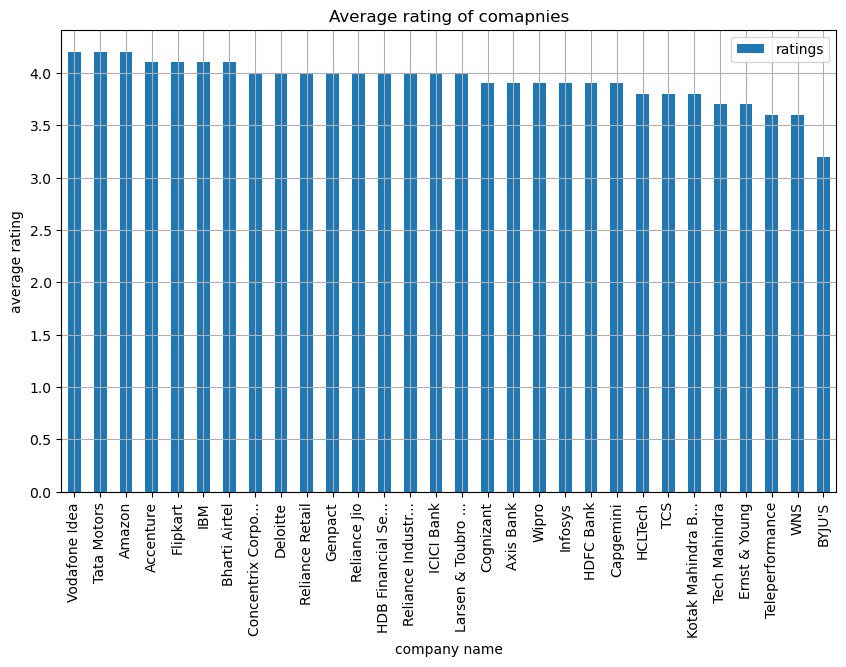

In [19]:
avg_ratings.plot(kind='bar',figsize=(10,6),title='Average rating of comapnies',xlabel='company name',ylabel='average rating',grid=True)
plt.show()

**Age of Comapnies**

In [20]:
#Creating Copy of dataframe, in order to get value of ages
df_copy = df.copy()

In [21]:
df_copy.drop_duplicates('name',inplace=True)

In [22]:
company_age = df_copy.loc[:,['name','years_old']].sort_values('years_old',ascending=False)

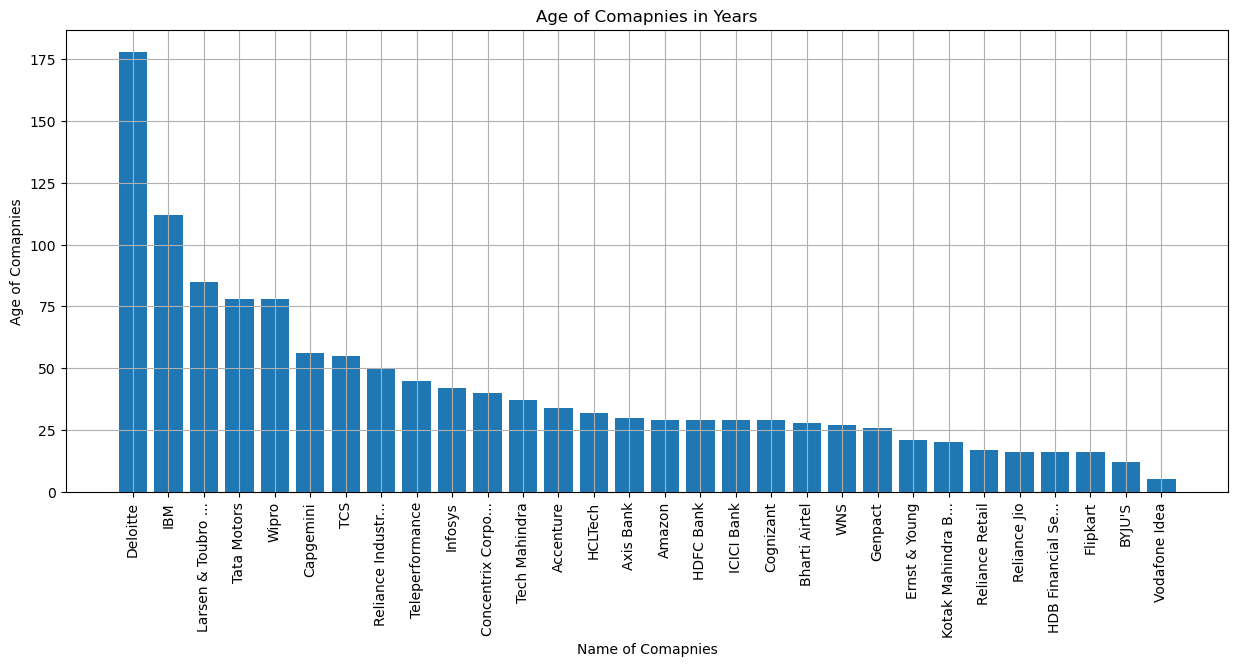

In [23]:
plt.figure(figsize=(15,6))
plt.bar(x=company_age['name'],height=company_age['years_old'])
plt.xticks(rotation=90)
plt.xlabel('Name of Comapnies')
plt.ylabel('Age of Comapnies')
plt.title('Age of Comapnies in Years')
plt.grid(True)
plt.show()